In [23]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection
from sklearn.datasets import load_svmlight_file

#load data
def get_data(path, n_features=None):
    if n_features == None:
        X, y = datasets.load_svmlight_file(path)
    else:
        X, y = datasets.load_svmlight_file(path, n_features=n_features)
    #append one column
    X = np.hstack([X.toarray(), np.ones((X.shape[0], 1))])
    y = np.array(y).reshape(X.shape[0],1)
    y[y==-1] = 0 #if y == -1, then y = 0
    return X, y

#loss_function
def compute_loss(X, y ,theta):
    y_pred = sigmod(X.dot(theta))
    loss = -1./X.shape[0] * (y*np.log(y_pred)+ (1-y)*np.log(1-y_pred)).sum()
    return loss

#gradient value
def gradient(X, y, theta):
    g = 1./X.shape[0] * np.dot(X.transpose(), sigmod(X.dot(theta))-y)
    return g

#sigmod function
def sigmod(z):
    return 1./(1+ np.exp(-z))

#get part of sample
def get_part(X, y ,min_part):
    i = np.random.randint(0, X.shape[0], size=min_part, dtype=int) #generate random int from 0 to 32561
    return X[i,:], y[i]    

#show function
def show(train_loss, test_loss):
    plt.plot(train_loss,'red',label='Train')
    plt.plot(test_loss,'black',label='test')
    plt.xlabel('round number')
    plt.ylabel('Loss value')
    plt.legend()
    plt.show()

In [27]:
def LogisticRegression(X_train, y_train, theta, item,
                       learning_rate=0.01, 
                       optimizer=None, 
                       optimizer_params=None):
    if optimizer == None:
        gred = gradient(X_train, y_train, theta)
        theta = theta - learning_rate*gred
    elif optimizer == "NAG":
        #initialize v and Gamma
        v = np.zeros(theta.shape)
        Gamma = 0.9
            
        grad = gradient(X_train, y_train, theta- Gamma*v)
        v = Gamma*v + learning_rate*grad
        theta = theta - v

    elif optimizer == "RMSProp":
        G = np.zeros(theta.shape)
        Gamma = 0.9
        Epsilon = 1e-7

        grad = gradient(X_train, y_train, theta)
        G = Gamma*G + (1-Gamma)*(grad**2)            
        theta = theta - learning_rate*grad/(np.sqrt(G+Epsilon))
            
    elif optimizer == "Adadelta":
        G = np.zeros(theta.shape)
        Delta = np.zeros(theta.shape)
        Gamma = 0.9
        Epsilon = 1e-7

        grad = gradient(X_train, y_train, theta)
        G = Gamma*G + (1-Gamma)*(grad**2)
        DeltaTheta = -((np.sqrt(Delta+Epsilon))/(np.sqrt(G+Epsilon)))*grad
        
        theta = theta + DeltaTheta
        Delta = Delta*Gamma + (1-Gamma)*(DeltaTheta**2)
            
    elif optimizer == "Adam":
        m = np.zeros(theta.shape)
        G = np.zeros(theta.shape)
        Alpha = np.zeros(theta.shape)
        Beta = 0.9
        Gamma = 0.999
        Epsilon = 1e-8
            
        grad = gradient(X_train, y_train, theta)
        m = Beta*m + (1-Beta)*grad
        G = Gamma*G + (1-Gamma)*(grad**2)
        Alpha = learning_rate * (np.sqrt(1-Gamma))/(1-Beta)
        theta = theta - Alpha*m/(np.sqrt(G + Epsilon))

    return theta

In [28]:
def main(learning_rate=0.01, 
         threshold=0.5, 
         min_part=64, 
         num_round=1000,     
         optimizer=None):
    trian_path = 'C:/Users/47864/Desktop/Data/a9a.txt'
    test_path = 'C:/Users/47864/Desktop/Data/a9a.t'
    X_train, y_train = get_data(trian_path)
    X_test, y_test = get_data(test_path, X_train.shape[1]-1)
    theta = np.random.random((X_train.shape[1], 1)) #random initialize
    train_loss = []
    test_loss = []
    for item in range(num_round):
        X_train_part, y_train_part = get_part(X_train, y_train, min_part)
        theta = LogisticRegression(X_train_part, y_train_part, theta, item=item, learning_rate=learning_rate, optimizer=optimizer)
        
        loss = compute_loss(X_train_part, y_train_part, theta)
        train_loss.append(loss)
        
        X_test_part, y_test_part = get_part(X_test, y_test, min_part)
        loss = compute_loss(X_test_part, y_test_part, theta)
        test_loss.append(loss)
    
    if optimizer != None:
        print(optimizer)
    if optimizer == None:
        print("without optimizer")
    show(train_loss, test_loss)

without optimizer


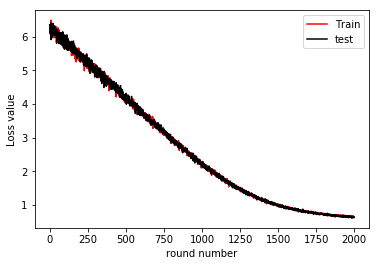

NAG


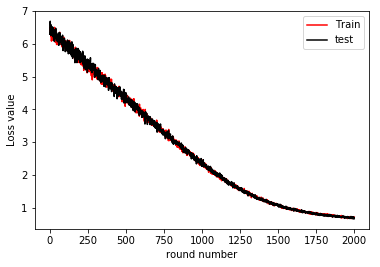

RMSProp


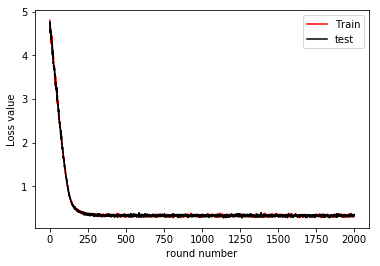

Adadelta


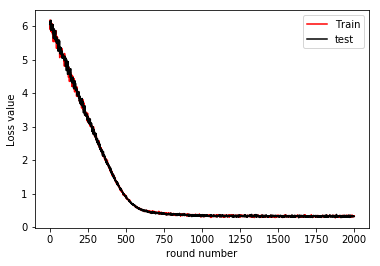

Adam


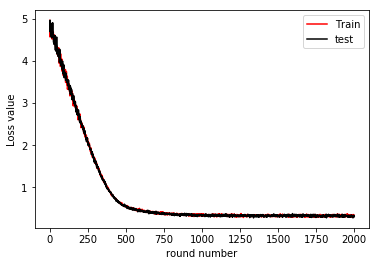

In [29]:
#Logistic Regression
main(learning_rate=0.001,
     threshold=0.5,
     min_part=1024,
     num_round=2000)
#NAG
main(learning_rate=0.001,
     threshold=0.5,
     min_part=1024,
     num_round=2000,
     optimizer='NAG')
#RMSProp
main(learning_rate=0.001,
     threshold=0.5,
     min_part=1024,
     num_round=2000,
     optimizer='RMSProp')
#Adadelta
main(learning_rate=0.001,
     threshold=0.5,
     min_part=1024,
     num_round=2000,
     optimizer='Adadelta')
#Adam
main(learning_rate=0.001,
     threshold=0.5,
     min_part=1024,
     num_round=2000,
     optimizer='Adam')